In [25]:
import pandas as pd
import numpy as np
from src.gd_linear_regression import train_val_split, gradient_descent, plot_losses


In [26]:
df = pd.read_csv("data/Housing.csv")
df.columns = [c.strip().lower() for c in df.columns]  # normalize col names

# Convert yes/no → 1/0 if needed
yn = {"yes": 1, "no": 0}
for col in ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","parking"]:
    if col in df.columns and df[col].dtype == "object":
        df[col] = df[col].str.lower().map(yn)

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [27]:
X = df[["area", "bedrooms", "bathrooms", "stories", "parking"]].to_numpy(float)
y = df["price"].to_numpy(float)

# Add bias (intercept) column
X = np.c_[np.ones(X.shape[0]), X]


In [28]:
Xtr, ytr, Xva, yva = train_val_split(X, y, train_ratio=0.8)


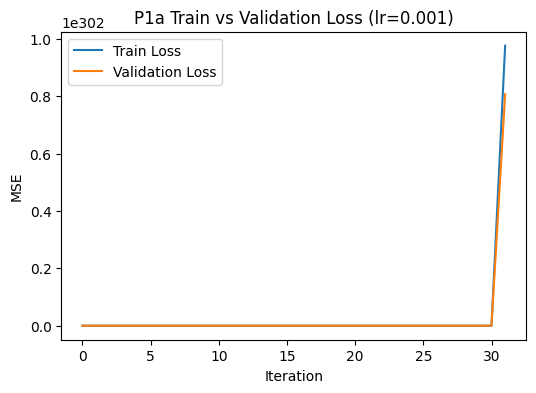

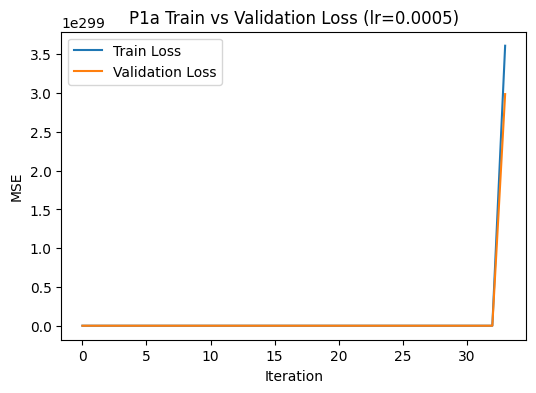

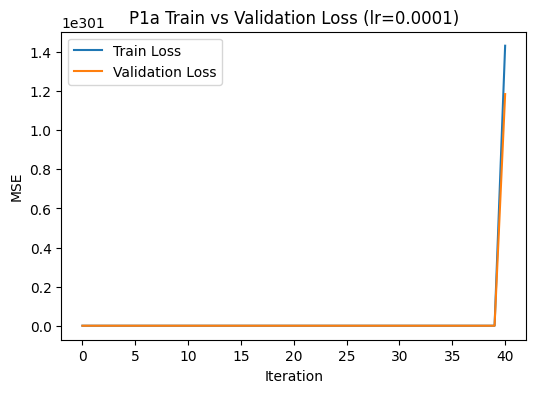

In [31]:
lrs = [0.001, 0.0005, 0.0001]

results = {}

for lr in lrs:
    theta, tr_losses, va_losses = gradient_descent(Xtr, ytr, Xva, yva, lr, iters=200)
    results[lr] = (theta, tr_losses, va_losses)
    plot_losses(tr_losses, va_losses, title=f"P1a Train vs Validation Loss (lr={lr})")



In [32]:
# Use only columns that actually exist in your CSV
feat_1b_all = [
    'area','bedrooms','bathrooms','stories',
    'mainroad','guestroom','basement','hotwaterheating',
    'airconditioning','parking','prefarea'
]
feat_1b = [c for c in feat_1b_all if c in df.columns]

X = df[feat_1b].to_numpy(float)
y = df['price'].to_numpy(float)

# add bias
X = np.c_[np.ones(X.shape[0]), X]
Xtr, ytr, Xva, yva = train_val_split(X, y, train_ratio=0.8, seed=42)
X.shape, Xtr.shape, Xva.shape


((545, 12), (436, 12), (109, 12))

c:\Users\Mariam\hw2-linear-regression\src\gd_linear_regression.py:6: RuntimeWarning: overflow encountered in square
  
c:\Users\Mariam\hw2-linear-regression\src\gd_linear_regression.py:29: RuntimeWarning: overflow encountered in matmul
  # Update
c:\Users\Mariam\hw2-linear-regression\src\gd_linear_regression.py:29: RuntimeWarning: invalid value encountered in matmul
  # Update
c:\Users\Mariam\hw2-linear-regression\src\gd_linear_regression.py:31: RuntimeWarning: invalid value encountered in subtract
  
c:\Users\Mariam\hw2-linear-regression\.venv\Lib\site-packages\numpy\_core\_methods.py:134: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


P1b — Best LR: 0.001
P1b — Best validation MSE: nan
P1b — θ (bias first):
 [nan nan nan nan nan nan nan nan nan nan nan nan]


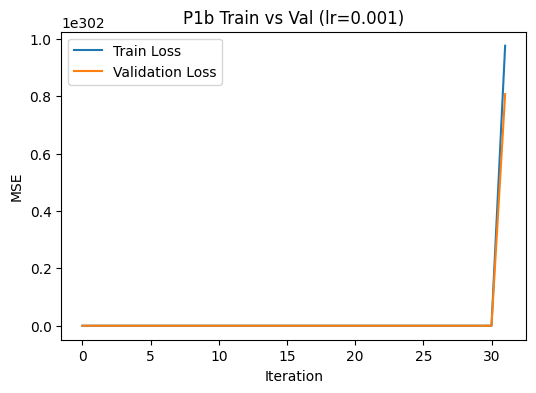

In [33]:
lrs = [1e-3, 5e-4, 1e-4]
best = None

for lr in lrs:
    theta, tr, va = gradient_descent(Xtr, ytr, Xva, yva, lr=lr, iters=4000)
    val = va[-1]
    if (best is None) or (val < best['val']):
        best = dict(lr=lr, theta=theta, tr=tr, va=va, val=val)

print("P1b — Best LR:", best['lr'])
print("P1b — Best validation MSE:", best['val'])
print("P1b — θ (bias first):\n", best['theta'])

plot_losses(best['tr'], best['va'], f"P1b Train vs Val (lr={best['lr']})")


In [34]:
def standardize_fit(X):
    mu = X.mean(axis=0); sigma = X.std(axis=0)
    sigma[sigma == 0] = 1.0
    return mu, sigma

def standardize_transform(X, mu, sigma):
    return (X - mu) / sigma

def normalize_fit(X):
    xmin = X.min(axis=0); xmax = X.max(axis=0)
    return xmin, xmax

def normalize_transform(X, xmin, xmax):
    denom = (xmax - xmin)
    denom[denom == 0] = 1.0
    return (X - xmin) / denom


P2a-Standardize — Best LR: 0.005
P2a-Standardize — Best Val MSE: 1619321620722.2947


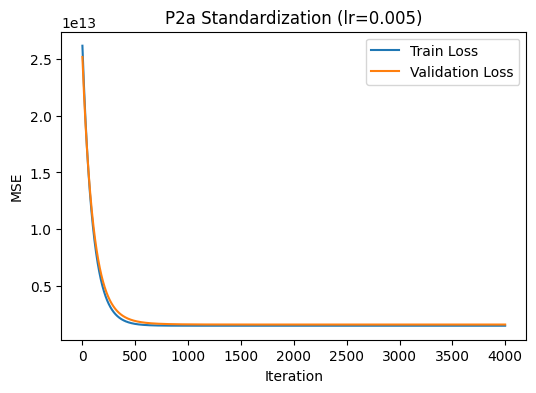

In [35]:
feat_1a = [c for c in ['area','bedrooms','bathrooms','stories','parking'] if c in df.columns]
X0 = df[feat_1a].to_numpy(float); y0 = df['price'].to_numpy(float)

Xtr0, ytr0, Xva0, yva0 = train_val_split(X0, y0, 0.8, seed=42)

mu, sigma = standardize_fit(Xtr0)
Xtr_s = standardize_transform(Xtr0, mu, sigma)
Xva_s  = standardize_transform(Xva0, mu, sigma)

# add bias AFTER scaling
Xtr_s = np.c_[np.ones(Xtr_s.shape[0]), Xtr_s]
Xva_s  = np.c_[np.ones(Xva_s.shape[0]),  Xva_s]

lrs = [0.1, 0.05, 0.01, 0.005]
best_s = None
for lr in lrs:
    th, tr, va = gradient_descent(Xtr_s, ytr0, Xva_s, yva0, lr=lr, iters=4000)
    val = va[-1]
    if (best_s is None) or (val < best_s['val']):
        best_s = dict(lr=lr, theta=th, tr=tr, va=va, val=val)

print("P2a-Standardize — Best LR:", best_s['lr'])
print("P2a-Standardize — Best Val MSE:", best_s['val'])
plot_losses(best_s['tr'], best_s['va'], f"P2a Standardization (lr={best_s['lr']})")


P2a-Normalize — Best LR: 0.1
P2a-Normalize — Best Val MSE: 1619382048715.1685


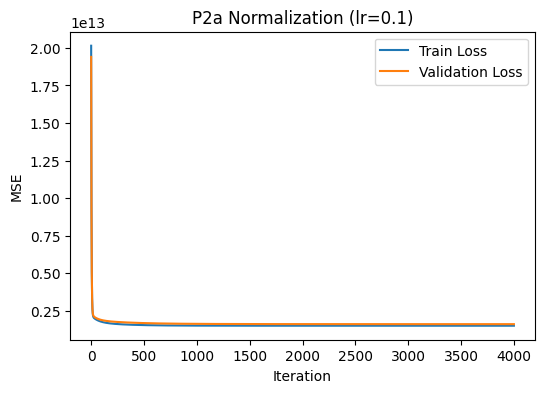

In [36]:
xmin, xmax = normalize_fit(Xtr0)
Xtr_n = normalize_transform(Xtr0, xmin, xmax)
Xva_n = normalize_transform(Xva0, xmin, xmax)

Xtr_n = np.c_[np.ones(Xtr_n.shape[0]), Xtr_n]
Xva_n = np.c_[np.ones(Xva_n.shape[0]),  Xva_n]

lrs = [0.1, 0.05, 0.01, 0.005]
best_n = None
for lr in lrs:
    th, tr, va = gradient_descent(Xtr_n, ytr0, Xva_n, yva0, lr=lr, iters=4000)
    val = va[-1]
    if (best_n is None) or (val < best_n['val']):
        best_n = dict(lr=lr, theta=th, tr=tr, va=va, val=val)

print("P2a-Normalize — Best LR:", best_n['lr'])
print("P2a-Normalize — Best Val MSE:", best_n['val'])
plot_losses(best_n['tr'], best_n['va'], f"P2a Normalization (lr={best_n['lr']})")


In [37]:
import numpy as np

def standardize_fit(X):
    mu = X.mean(axis=0); sigma = X.std(axis=0)
    sigma[sigma == 0] = 1.0
    return mu, sigma

def standardize_transform(X, mu, sigma):
    return (X - mu) / sigma

def normalize_fit(X):
    xmin = X.min(axis=0); xmax = X.max(axis=0)
    return xmin, xmax

def normalize_transform(X, xmin, xmax):
    denom = (xmax - xmin)
    denom[denom == 0] = 1.0
    return (X - xmin) / denom


P2b-Standardization — Best LR: 0.1
P2b-Standardization — Best Val MSE: 1288760073344.5854


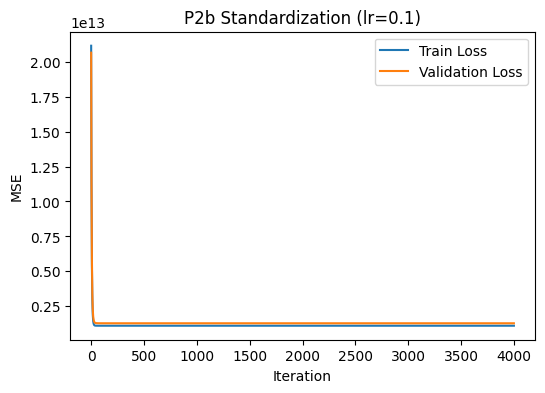

P2b-Normalization — Best LR: 0.1
P2b-Normalization — Best Val MSE: 1288829978533.1921


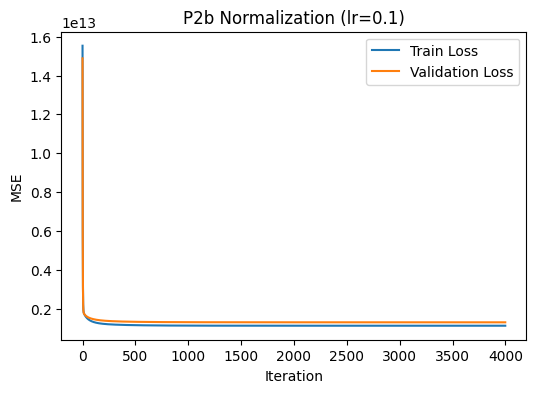

In [38]:
from src.gd_linear_regression import train_val_split, gradient_descent, plot_losses

# 1b feature set (use only the columns that exist)
feat_1b_all = ['area','bedrooms','bathrooms','stories','mainroad','guestroom',
               'basement','hotwaterheating','airconditioning','parking','prefarea']
feat_1b = [c for c in feat_1b_all if c in df.columns]

X0 = df[feat_1b].to_numpy(float)
y0 = df['price'].to_numpy(float)

# split once for fair comparison
Xtr0, ytr0, Xva0, yva0 = train_val_split(X0, y0, train_ratio=0.8, seed=42)

# ----- Standardization -----
mu, sigma = standardize_fit(Xtr0)
Xtr_s = standardize_transform(Xtr0, mu, sigma)
Xva_s  = standardize_transform(Xva0, mu, sigma)

# add bias AFTER scaling
Xtr_s = np.c_[np.ones(Xtr_s.shape[0]), Xtr_s]
Xva_s  = np.c_[np.ones(Xva_s.shape[0]),  Xva_s]

best_std = None
for lr in [0.1, 0.05, 0.01, 0.005, 0.001]:
    th, tr, va = gradient_descent(Xtr_s, ytr0, Xva_s, yva0, lr=lr, iters=4000)
    val = va[-1]
    if (best_std is None) or (val < best_std['val']):
        best_std = dict(lr=lr, theta=th, tr=tr, va=va, val=val)

print("P2b-Standardization — Best LR:", best_std['lr'])
print("P2b-Standardization — Best Val MSE:", best_std['val'])
plot_losses(best_std['tr'], best_std['va'], f"P2b Standardization (lr={best_std['lr']})")

# ----- Normalization -----
xmin, xmax = normalize_fit(Xtr0)
Xtr_n = normalize_transform(Xtr0, xmin, xmax)
Xva_n = normalize_transform(Xva0, xmin, xmax)

Xtr_n = np.c_[np.ones(Xtr_n.shape[0]), Xtr_n]
Xva_n  = np.c_[np.ones(Xva_n.shape[0]),  Xva_n]

best_norm = None
for lr in [0.1, 0.05, 0.01, 0.005, 0.001]:
    th, tr, va = gradient_descent(Xtr_n, ytr0, Xva_n, yva0, lr=lr, iters=4000)
    val = va[-1]
    if (best_norm is None) or (val < best_norm['val']):
        best_norm = dict(lr=lr, theta=th, tr=tr, va=va, val=val)

print("P2b-Normalization — Best LR:", best_norm['lr'])
print("P2b-Normalization — Best Val MSE:", best_norm['val'])
plot_losses(best_norm['tr'], best_norm['va'], f"P2b Normalization (lr={best_norm['lr']})")


In [39]:
import numpy as np

def gd_with_l2(Xtr, ytr, Xva, yva, lr=0.01, iters=4000, lam=1e-3):
    """
    L2 penalty applied only to training gradient. Bias term (theta[0]) is NOT regularized.
    Validation loss is plain MSE (no penalty), per homework instructions.
    """
    m, n = Xtr.shape
    theta = np.zeros(n)
    tr_losses, va_losses = [], []

    for _ in range(iters):
        y_pred = Xtr @ theta
        grad = (1/m) * (Xtr.T @ (y_pred - ytr))
        # L2 on weights only (skip bias index 0)
        reg = np.r_[0.0, (2*lam/m) * theta[1:]]
        grad += reg
        theta -= lr * grad

        tr_losses.append(np.mean((ytr - Xtr @ theta)**2))   # no penalty in loss
        va_losses.append(np.mean((yva - Xva @ theta)**2))   # no penalty in eval

    return theta, tr_losses, va_losses


3a Standardization: best λ = 0.01 val MSE = 1619320180148.595


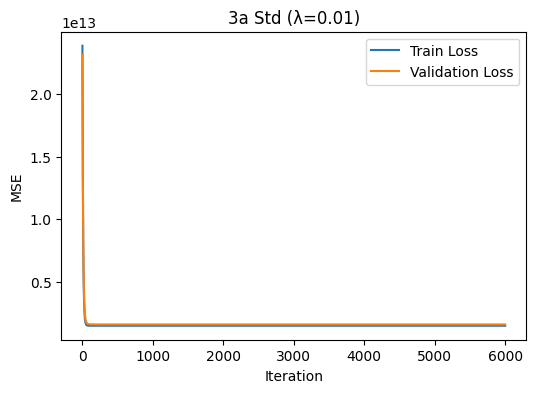

3a Normalization:   best λ = 0.0 val MSE = 1619693056251.8367


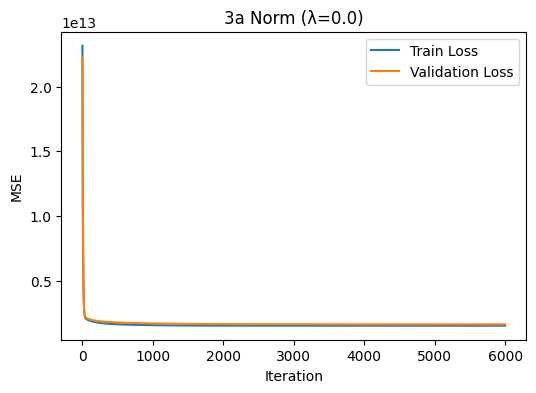

In [40]:
from src.gd_linear_regression import train_val_split, plot_losses

feat_1a = [c for c in ['area','bedrooms','bathrooms','stories','parking'] if c in df.columns]
X0 = df[feat_1a].to_numpy(float); y0 = df['price'].to_numpy(float)
Xtr0, ytr0, Xva0, yva0 = train_val_split(X0, y0, 0.8, seed=42)

def run_l2_for_scaling(Xtr0, Xva0, ytr0, yva0, scaling_name):
    if scaling_name == 'std':
        mu, sigma = standardize_fit(Xtr0)
        Xtr = standardize_transform(Xtr0, mu, sigma); Xva = standardize_transform(Xva0, mu, sigma)
    else:
        xmin, xmax = normalize_fit(Xtr0)
        Xtr = normalize_transform(Xtr0, xmin, xmax); Xva = normalize_transform(Xva0, xmin, xmax)

    Xtr = np.c_[np.ones(Xtr.shape[0]), Xtr]
    Xva = np.c_[np.ones(Xva.shape[0]), Xva]

    best = None
    for lam in [0.0, 1e-5, 1e-4, 1e-3, 1e-2]:
        # moderate lr works well once scaled; tweak if needed
        theta, tr, va = gd_with_l2(Xtr, ytr0, Xva, yva0, lr=0.05, iters=6000, lam=lam)
        val = va[-1]
        if (best is None) or (val < best['val']):
            best = dict(lam=lam, theta=theta, tr=tr, va=va, val=val)
    return best

best_std_3a = run_l2_for_scaling(Xtr0, Xva0, ytr0, yva0, 'std')
best_norm_3a = run_l2_for_scaling(Xtr0, Xva0, ytr0, yva0, 'norm')

print("3a Standardization: best λ =", best_std_3a['lam'], "val MSE =", best_std_3a['val'])
plot_losses(best_std_3a['tr'], best_std_3a['va'], f"3a Std (λ={best_std_3a['lam']})")

print("3a Normalization:   best λ =", best_norm_3a['lam'], "val MSE =", best_norm_3a['val'])
plot_losses(best_norm_3a['tr'], best_norm_3a['va'], f"3a Norm (λ={best_norm_3a['lam']})")


3b Standardization: best λ = 0.01 val MSE = 1288752807502.642


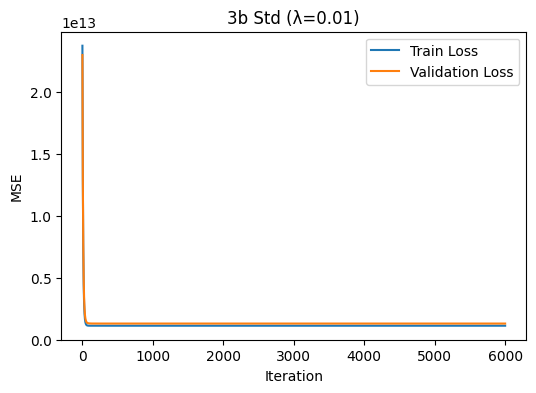

3b Normalization:   best λ = 0.01 val MSE = 1288973824314.958


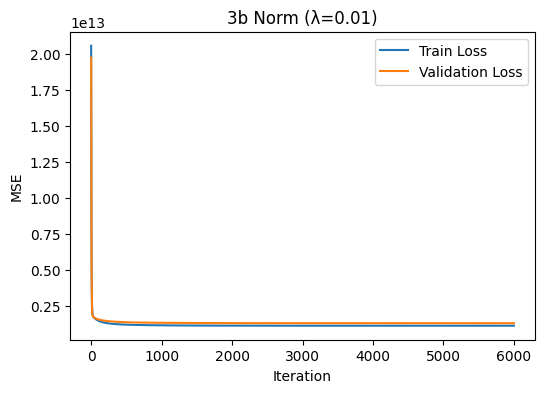

In [41]:
feat_1b_all = ['area','bedrooms','bathrooms','stories','mainroad','guestroom',
               'basement','hotwaterheating','airconditioning','parking','prefarea']
feat_1b = [c for c in feat_1b_all if c in df.columns]
X0 = df[feat_1b].to_numpy(float); y0 = df['price'].to_numpy(float)
Xtr0, ytr0, Xva0, yva0 = train_val_split(X0, y0, 0.8, seed=42)

best_std_3b = run_l2_for_scaling(Xtr0, Xva0, ytr0, yva0, 'std')
best_norm_3b = run_l2_for_scaling(Xtr0, Xva0, ytr0, yva0, 'norm')

print("3b Standardization: best λ =", best_std_3b['lam'], "val MSE =", best_std_3b['val'])
plot_losses(best_std_3b['tr'], best_std_3b['va'], f"3b Std (λ={best_std_3b['lam']})")

print("3b Normalization:   best λ =", best_norm_3b['lam'], "val MSE =", best_norm_3b['val'])
plot_losses(best_norm_3b['tr'], best_norm_3b['va'], f"3b Norm (λ={best_norm_3b['lam']})")
